## Introduction

1. **Getting the data** - in this case, we'll be scraping data from a website
2. **Cleaning the data** - we will walk through popular text pre-processing techniques
3. **Organizing the data** - we will organize the cleaned data into a way that is easy to input into other algorithms


## Problem Statement

## Objective of this work  
To investigate factors affecting the rating of comedians:


*   Polarity
*   subjectivity
*   Profanity
*   number of unique words
*   run time
*   number of words per minutes




 



## Getting The Data

Luckily, there are wonderful people online that keep track of stand up routine transcripts. [Scraps From The Loft](http://scrapsfromtheloft.com) makes them available for non-profit and educational purposes.



In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/2020/06/22/roy-wood-jr-father-figure-transcript/', 
        'https://scrapsfromtheloft.com/2019/08/26/dave-chappelle-sticks-stones-transcript/',
        'https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/',
        'https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/',
        'https://scrapsfromtheloft.com/2020/05/26/hannah-gadsby-douglas-transcript/',
        'https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/',
        'https://scrapsfromtheloft.com/2020/05/10/russell-peters-deported-transcript/',
        'https://scrapsfromtheloft.com/2020/05/02/sincerely-louis-ck-transcript/',
        'https://scrapsfromtheloft.com/2020/05/01/maria-bamford-weakness-is-the-brand-transcript/',
        'https://scrapsfromtheloft.com/2020/03/25/tom-segura-ball-hog-transcript/',
        'https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/',
        'https://scrapsfromtheloft.com/2020/02/27/amanda-seales-i-be-knowin-transcript/',
        'https://scrapsfromtheloft.com/2019/05/16/colin-quinn-the-new-york-story-transcript/',
        'https://scrapsfromtheloft.com/2017/09/18/norm-macdonald-hitlers-dog-gossip-trickery-2017-full-transcript/',
        'https://scrapsfromtheloft.com/2020/06/07/dylan-moran-the-expedition-transcript/',
        'https://scrapsfromtheloft.com/2020/06/01/ramy-youssef-feelings-transcript/',
        'https://scrapsfromtheloft.com/2020/06/02/chris-gethard-career-suicide-transcript/',
        'https://scrapsfromtheloft.com/2020/06/01/kenny-sebastian-dont-be-that-guy-transcript/',
        'https://scrapsfromtheloft.com/2020/05/27/billy-connolly-high-horse-tour-live-transcript/',
        'https://scrapsfromtheloft.com/2020/05/10/jimmy-o-yang-good-deal-transcript/',
        'https://scrapsfromtheloft.com/2020/05/09/jo-koy-lights-out-2012-full-transcript/',
        'https://scrapsfromtheloft.com/2020/05/08/lee-mack-going-out-live-transcript/',
        'https://scrapsfromtheloft.com/2020/05/06/t-j-miller-no-real-reason-transcript/',
        'https://scrapsfromtheloft.com/2020/05/02/jim-norton-american-degenerate-transcript/',
        'https://scrapsfromtheloft.com/2020/05/01/daniel-sloss-x-transcript/',
        'https://scrapsfromtheloft.com/2020/04/19/chris-d-elia-man-on-fire-transcript/',
        'https://scrapsfromtheloft.com/2020/03/12/marc-maron-end-times-fun-transcript/',
        'https://scrapsfromtheloft.com/2020/03/21/bert-kreischer-hey-big-boy-transcript/',
        'https://scrapsfromtheloft.com/2020/02/10/stewart-lee-content-provider-transcript/',
        'https://scrapsfromtheloft.com/2020/02/02/sara-pascoe-ladsladslads-2019-full-transcript/',
        'https://scrapsfromtheloft.com/2020/01/23/dan-soder-son-of-a-gary-transcript/',
        'https://scrapsfromtheloft.com/2020/01/19/jim-gaffigan-quality-time-transcript/',
        'https://scrapsfromtheloft.com/2019/12/22/kevin-bridges-whole-different-story-transcript/',
        'https://scrapsfromtheloft.com/2019/12/14/michelle-wolf-joke-show-transcript/',
        'https://scrapsfromtheloft.com/2017/12/20/anjelah-johnson-not-fancy-transcript/',
        'https://scrapsfromtheloft.com/2018/10/19/ron-white-if-you-quit-listening-ill-shutup-transcript/',
        'https://scrapsfromtheloft.com/2019/04/30/robin-williams-weapons-of-self-destruction-transcript/',
        'https://scrapsfromtheloft.com/2019/04/05/kevin-hart-irresponsible-transcript/',
        'https://scrapsfromtheloft.com/2019/03/23/amy-schumer-growing-transcript/',
        'https://scrapsfromtheloft.com/2018/11/21/trevor-noah-son-of-patricia-transcript/',
        'https://scrapsfromtheloft.com/2017/09/30/daniel-tosh-completely-serious-2007-full-transcript/',
        'https://scrapsfromtheloft.com/2018/08/11/demetri-martin-overthinker-transcript/']

# Comedian names

comedians = ['roy', 'dave', 'jerry', 'mark', 'hannah', 'patton', 'russel', 'sincerely', 'maria', 'tom', 'pete', 'amanda', 
             'colin', 'norm', 'dylan', 'ramy', 'chris', 'kenny', 'billy', 'jimmy', 'jo', 'lee', 'tj', 'jim_norton', 'daniel', 'chris_d',
             'marc', 'bert', 'stewart', 'sara', 'dan', 'jim_gaffigan', 'kevin', 'michelle', 'anjelah', 'ron', 'robin', 'kevin_hart',
             'amy', 'trevor', 'daniel_tosh', 'demetri']


In [ ]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2020/06/22/roy-wood-jr-father-figure-transcript/
https://scrapsfromtheloft.com/2019/08/26/dave-chappelle-sticks-stones-transcript/
https://scrapsfromtheloft.com/2020/05/06/jerry-seinfeld-23-hours-to-kill-transcript/
https://scrapsfromtheloft.com/2020/06/13/mark-normand-dont-be-yourself-transcript/
https://scrapsfromtheloft.com/2020/05/26/hannah-gadsby-douglas-transcript/
https://scrapsfromtheloft.com/2020/05/20/patton-oswalt-i-love-everything-transcript/
https://scrapsfromtheloft.com/2020/05/10/russell-peters-deported-transcript/
https://scrapsfromtheloft.com/2020/05/02/sincerely-louis-ck-transcript/
https://scrapsfromtheloft.com/2020/05/01/maria-bamford-weakness-is-the-brand-transcript/
https://scrapsfromtheloft.com/2020/03/25/tom-segura-ball-hog-transcript/
https://scrapsfromtheloft.com/2020/03/01/pete-davidson-alive-from-new-york-transcript/
https://scrapsfromtheloft.com/2020/02/27/amanda-seales-i-be-knowin-transcript/
https://scrapsfromtheloft.com/2019

In [ ]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
  with open("transcripts/" + c + ".txt", "wb") as file:
    pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['roy', 'dave', 'jerry', 'mark', 'hannah', 'patton', 'russel', 'sincerely', 'maria', 'tom', 'pete', 'amanda', 'colin', 'norm', 'dylan', 'ramy', 'chris', 'kenny', 'billy', 'jimmy', 'jo', 'lee', 'tj', 'jim_norton', 'daniel', 'chris_d', 'marc', 'bert', 'stewart', 'sara', 'dan', 'jim_gaffigan', 'kevin', 'michelle', 'anjelah', 'ron', 'robin', 'kevin_hart', 'amy', 'trevor', 'daniel_tosh', 'demetri'])

In [ ]:
# More checks
data['roy'][:3]

['Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Number one, I need you to treat women with respect always. Even if you think you’re right, be respectful. Number two, don’t mix white and dark liquor. That’s how you end up in the back of a police car. Speaking of which, get you a white friend. Black men with white friends are 38% less likely to be shot by the police. Are you listening? You just gonna stare at me. [baby cooing] You just gonna stare. That’s what you’re gonna do? This is serious stuff, man. I’m gonna put this on video for you, and when you’re old enough, you come back and watch it, deal? All right, deal.',
 '[audience cheering]',
 'Thank you, Frederick Douglass.']

## Cleaning the Data


**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization


In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'roy'

In [ ]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Number one, I need you to treat women with respect always. Even if you think you’re right, be respectful. Number two, don’t mix white and dark liquor. That’s how you end up in the back of a police car. Speaking of which, get you a white friend. Black men with white friends are 38% less likely to be shot by the police. Are you listening? You just gonna stare at me. [baby cooing] You just gonna stare. That’s what you’re gonna do? This is serious stuff, man. I’m gonna put this on video for you, and when you’re old enough, you come back and watch it, deal? All right, deal.',
 '[audience cheering]',
 'Thank you, Frederick Douglass.',
 '[cheers and applause]',
 'But if we get rid of the Confederate flag…',
 '[laughter]',
 '[man] Yeah!',
 '…how am I gonna know who the dangerous white people are? I’m just saying, the flag had a couple upsides. Let’s jus

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
data_combined.items()

dict_items([('roy', ["Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Number one, I need you to treat women with respect always. Even if you think you’re right, be respectful. Number two, don’t mix white and dark liquor. That’s how you end up in the back of a police car. Speaking of which, get you a white friend. Black men with white friends are 38% less likely to be shot by the police. Are you listening? You just gonna stare at me. [baby cooing] You just gonna stare. That’s what you’re gonna do? This is serious stuff, man. I’m gonna put this on video for you, and when you’re old enough, you come back and watch it, deal? All right, deal. [audience cheering] Thank you, Frederick Douglass. [cheers and applause] But if we get rid of the Confederate flag… [laughter] [man] Yeah! …how am I gonna know who the dangerous white people are? I’m just saying, the flag had a couple upsides. Let’s just be rea

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

transcript
amanda        Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for...
amy           Yes! Thank you so much, Chicago. Thank you. I used to do something a lot of comics do. I would blame my disgusting behavior on the city I was in. ...
anjelah       Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...
bert          [electronic music playing] [male announcer] Ladies and gentlemen… Bert Kreischer! [crowd cheering] Yeah! What’s up? Cleveland! [cheering, whooping...
billy         Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...
chris         ♪ I hate my brain ♪\n♪ Because the things I think sometimes ♪\n♪ Are so judgmental and lame ♪\n♪ I’ve got everything that I want ♪\n♪ Except my se...
chris_d       [♪♪♪] ♪ Fire ♪\n♪ Fire ♪ [audience cheering] ♪ Man on fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Man on fire ♪ Yes. [audience continues cheering] Yes...
colin         [disco music playing] [horn blows] ♪ Young and pretty New York City girl ♪\n♪ Twenty-five, 35, hello, baby, New York City girl ♪\n♪ You grew up ri...
dan           Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti...
daniel        A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...
daniel_tosh    Recorded at OC Pavilion in Santa Ana, CA Dan, in five minutes. Daniel. Let’s begin. Ladies and gentlemen. Daniel Tosh. Thank you. Thank you. I de...
dave          Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt...
demetri       [cheering, applause] [Demetri] Man, that was a good improv. I’m so glad I asked for notes. I think my favorite animal to look at is probably the s...
dylan           To give his wife some space, Aiden undertakes a tough Arctic expedition with her brother. Written and performed by Dylan Moran.  Original Broadc...
hannah        The following is the transcript of Hannah Gadbsy: Douglas. In her second Netflix special, named after her dog, Gadsby explores how autism affects ...
jerry         Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...
jim_gaffigan  (audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th...
jim_norton    This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...
jimmy         ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...
jo            [hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...
kenny         Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...
kevin         Ladies and gentlemen, please welcome Kevin Bridges! APPLAUSE Yes, thank you, Glasgow! Saturday night, Glasgow. Thank you. Yes, welcome, welcome, w...
kevin_hart    [heartbeat] [indistinct chatter] [atmospheric whooshing] [audience cheering] It’s showtime, honey? Babe, I’m gone. [woman] Coming. Alright. See yo...
lee           This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee...
marc          [audience chattering indistinctly] [man

In [ ]:
# Let's take a look at the transcript for Dave Chappelle
data_df.transcript.loc['dave']

'Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt flat in leather pants, aviator shades and a remarkably long t-shirt. [Morgan Freeman] This is Dave. He tells jokes for a living. Hopefully he makes people laugh, but these days it’s a high stakes game. Hmm, how did we get here, I wonder? I don’t mean that metaphorically, I’m really asking: how did Dave get here? I mean, what the fuck is this? But what do I know? I’m just Morgan Freeman. Anyway, I guess what I’m trying to say is\xa0if you say anything… you risk everything. But if that’s the way it’s gotta be—okay, fine, fuck it!  Ahahah, he’s back folks! Sticks & Stones streamed August 26, 2019 on Netflix. “TELL ME SOMETHING’ YOU MOTHAFUCKAS\nCAN’T TELL ME NOTHIN’ I’D RATHER DIE THAN\nTO LISTEN TO YOU…” —KENDRICK LAMAR,\nPULITZER PRIZE WINNER “I KNOW REAL NIGGAS\nHAPPEN TO LOVE IT” —SHAWN CARTER\n(BILLIONAIRE) ♪ I was dreaming When I wrote t

##Data cleaning 

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

transcript
amanda        now y’all keep asking me “amanda who is this special for” and i keep telling y’all “it’s for my sisters” but it’s comedy so it’s really for everyb...
amy           yes thank you so much chicago thank you i used to do something a lot of comics do i would blame my disgusting behavior on the city i was in you kn...
anjelah       not fancy was filmed at the city national grove in anaheim california anjelah johnson talks about touring and prepping for her trip to europe her ...
bert            ladies and gentlemen… bert kreischer  yeah what’s up cleveland  i took a shit in a genderneutral bathroom the other day…  …that made the woman i...
billy         ladies and gentlemen would you please welcome billy connolly you’re only doing that because i’m not well “i love you billy” i’m not a well man we’...
chris         ♪ i hate my brain ♪\n♪ because the things i think sometimes ♪\n♪ are so judgmental and lame ♪\n♪ i’ve got everything that i want ♪\n♪ except my se...
chris_d        ♪ fire ♪\n♪ fire ♪  ♪ man on fire ♪\n♪ fire ♪\n♪ fire ♪\n♪ fire ♪\n♪ man on fire ♪ yes  yes all right yeah all right just relax we’re fucking her...
colin           ♪ young and pretty new york city girl ♪\n♪ twentyfive  hello baby new york city girl ♪\n♪ you grew up ridin’ the subways running with people ♪\n...
dan           announcer ladies and gentlemen dan soder cheers and applause cheering continues chuckles yeah yay how the hell are ya cheering continues wha ah al...
daniel        a man offered us a billion dollars – bolt the doors – we could all go to prison enjoy the injunction did you just try to punch the wall and miss n...
daniel_tosh    recorded at oc pavilion in santa ana ca dan in five minutes daniel let’s begin ladies and gentlemen daniel tosh thank you thank you i deserve tha...
dave          sticks  stones is dave chappelle’s fifth netflix special\nin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt f...
demetri         man that was a good improv i’m so glad i asked for notes i think my favorite animal to look at is probably the squirrel  yeah you know what i me...
dylan           to give his wife some space aiden undertakes a tough arctic expedition with her brother written and performed by dylan moran  original broadcast...
hannah        the following is the transcript of hannah gadbsy douglas in her second netflix special named after her dog gadsby explores how autism affects her ...
jerry         jerry seinfeld’s new hourlong comedy special jerry seinfeld  hours to kill is now available on netflix  elicopeter pilot mr seinfeld you have a sh...
jim_gaffigan  audience cheering applauding thank you thank you oh my god thank you thank you for coming out audience cheering it’s good to be here this is what ...
jim_norton    this year i wanted the opening of my new special to feel well special so i wanted to get somebody who is not only well known but who my audience w...
jimmy         announcer ladies and gentlemen welcome to the stage… jimmy o yang   how’s everybody doing yes yes thank you thank you guys very much for coming ou...
jo             la are you ready  live from the alex theatre give it up for jo koy what what oh shit wow we’re in los angel– this is why i love coming home to lo...
kenny         make some noise for kenny sebastian oh my god thank you so much mumbai thank you thank you really how are you guys doing oh shit let’s do this com...
kevin         ladies and gentlemen please welcome kevin bridges applause yes thank you glasgow saturday night glasgow thank you yes welcome welcome welcome alon...
kevin_hart        it’s showtime honey babe i’m gone  coming alright see you later  love you showtime baby let’s go show time bro  i’ll see you on the other side...
lee           this programme contains strong language  over  dates across the country but this is the big one the one he’s really been looking forward to the be...
marc            ladies and gentlemen please welcome t

In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('♪', '',text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

transcript
amanda        now yall keep asking me amanda who is this special for and i keep telling yall its for my sisters but its comedy so its really for everybody okay ...
amy           yes thank you so much chicago thank you i used to do something a lot of comics do i would blame my disgusting behavior on the city i was in you kn...
anjelah       not fancy was filmed at the city national grove in anaheim california anjelah johnson talks about touring and prepping for her trip to europe her ...
bert            ladies and gentlemen bert kreischer  yeah whats up cleveland  i took a shit in a genderneutral bathroom the other day  that made the woman in th...
billy         ladies and gentlemen would you please welcome billy connolly youre only doing that because im not well i love you billy im not a well man well hav...
chris          i hate my brain  because the things i think sometimes  are so judgmental and lame  ive got everything that i want  except my set of expectations ...
chris_d         fire  fire    man on fire  fire  fire  fire  man on fire  yes  yes all right yeah all right just relax were fucking here doing this in canada im...
colin            young and pretty new york city girl  twentyfive  hello baby new york city girl  you grew up ridin the subways running with people  up in harlem...
dan           announcer ladies and gentlemen dan soder cheers and applause cheering continues chuckles yeah yay how the hell are ya cheering continues wha ah al...
daniel        a man offered us a billion dollars – bolt the doors – we could all go to prison enjoy the injunction did you just try to punch the wall and miss n...
daniel_tosh    recorded at oc pavilion in santa ana ca dan in five minutes daniel lets begin ladies and gentlemen daniel tosh thank you thank you i deserve that...
dave          sticks  stones is dave chappelles fifth netflix specialin the promotional trailer morgan freeman narrates as chappelle swaggers across a salt flat...
demetri         man that was a good improv im so glad i asked for notes i think my favorite animal to look at is probably the squirrel  yeah you know what i mea...
dylan           to give his wife some space aiden undertakes a tough arctic expedition with her brother written and performed by dylan moran  original broadcast...
hannah        the following is the transcript of hannah gadbsy douglas in her second netflix special named after her dog gadsby explores how autism affects her ...
jerry         jerry seinfelds new hourlong comedy special jerry seinfeld  hours to kill is now available on netflix  elicopeter pilot mr seinfeld you have a sho...
jim_gaffigan  audience cheering applauding thank you thank you oh my god thank you thank you for coming out audience cheering its good to be here this is what i...
jim_norton    this year i wanted the opening of my new special to feel well special so i wanted to get somebody who is not only well known but who my audience w...
jimmy         announcer ladies and gentlemen welcome to the stage jimmy o yang   hows everybody doing yes yes thank you thank you guys very much for coming out ...
jo             la are you ready  live from the alex theatre give it up for jo koy what what oh shit wow were in los angel– this is why i love coming home to los...
kenny         make some noise for kenny sebastian oh my god thank you so much mumbai thank you thank you really how are you guys doing oh shit lets do this come...
kevin         ladies and gentlemen please welcome kevin bridges applause yes thank you glasgow saturday night glasgow thank you yes welcome welcome welcome alon...
kevin_hart        its showtime honey babe im gone  coming alright see you later  love you showtime baby lets go show time bro  ill see you on the other side bab...
lee           this programme contains strong language  over  dates across the country but this is the big one the one hes really been looking forward to the bes...
marc            ladies and gentlemen please welcome t

## Organizing The Data


1. **Corpus** - a collection of text
2. **Document-Term Matrix**  -word counts in matrix format

### Corpus

We already created a corpus in an earlier step. The definition of a corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
# Let's take a look at our dataframe
data_df

transcript
amanda        Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for...
amy           Yes! Thank you so much, Chicago. Thank you. I used to do something a lot of comics do. I would blame my disgusting behavior on the city I was in. ...
anjelah       Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...
bert          [electronic music playing] [male announcer] Ladies and gentlemen… Bert Kreischer! [crowd cheering] Yeah! What’s up? Cleveland! [cheering, whooping...
billy         Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...
chris         ♪ I hate my brain ♪\n♪ Because the things I think sometimes ♪\n♪ Are so judgmental and lame ♪\n♪ I’ve got everything that I want ♪\n♪ Except my se...
chris_d       [♪♪♪] ♪ Fire ♪\n♪ Fire ♪ [audience cheering] ♪ Man on fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Man on fire ♪ Yes. [audience continues cheering] Yes...
colin         [disco music playing] [horn blows] ♪ Young and pretty New York City girl ♪\n♪ Twenty-five, 35, hello, baby, New York City girl ♪\n♪ You grew up ri...
dan           Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti...
daniel        A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...
daniel_tosh    Recorded at OC Pavilion in Santa Ana, CA Dan, in five minutes. Daniel. Let’s begin. Ladies and gentlemen. Daniel Tosh. Thank you. Thank you. I de...
dave          Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt...
demetri       [cheering, applause] [Demetri] Man, that was a good improv. I’m so glad I asked for notes. I think my favorite animal to look at is probably the s...
dylan           To give his wife some space, Aiden undertakes a tough Arctic expedition with her brother. Written and performed by Dylan Moran.  Original Broadc...
hannah        The following is the transcript of Hannah Gadbsy: Douglas. In her second Netflix special, named after her dog, Gadsby explores how autism affects ...
jerry         Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...
jim_gaffigan  (audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th...
jim_norton    This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...
jimmy         ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...
jo            [hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...
kenny         Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...
kevin         Ladies and gentlemen, please welcome Kevin Bridges! APPLAUSE Yes, thank you, Glasgow! Saturday night, Glasgow. Thank you. Yes, welcome, welcome, w...
kevin_hart    [heartbeat] [indistinct chatter] [atmospheric whooshing] [audience cheering] It’s showtime, honey? Babe, I’m gone. [woman] Coming. Alright. See yo...
lee           This programme contains strong language [APPLAUSE AND CHEERING] Over 100 dates across the country but this is the big one, the one he’s really bee...
marc          [audience chattering indistinctly] [man

In [ ]:
# Let's add the comedians' full names as well  # new comedian: 'Colin Quinn', 'Norm Macdonald',
full_names = ['Amanda Seales', 'Amy Schumer', 'Anjelah Johnson', 'Bert Kreischer', 'Billy Connolly', 'Chris Gethard',
              'Chris DElia', 'Colin Quinn', 'Dan Soder', 'Daniel Sloss', 'Daniel Tosh',  'Dave Chappelle', 'Demetri Martin',
              'Dylan Moran', 'Hannah Gadsby','Jerry Seinfeld', 'Jim Gaffigan', 'Jim Norton', 'Jimmy Yang', 'Jo Koy', 'Kenny Sebastian',
              'Kevin Bridges', 'Kevin Hart', 'Lee Mack', 'Marc Maron', 'Maria Bamford', 'Mark Normand', 'Michelle Wolf',
              'Norm Macdonald', 'Patton Oswalt', 'Pete Davidson', 'Ramy Youssef', 'Robin Williams', 'Ron White', 'Roy Wood Jr.', 
              'Russell Peters', 'Sara Pascoe', 'Sincerely Louis CK', 'Stewart Lee', 'T.J. Miller', 'Tom Segura', 'Trevor Noah']
ratings =[6.4, 5.2, 5.8, 7.1, 7.8, 7.6, 6.6, 6.8, 7.5, 8.5, 7.7, 8.5, 8.2, 7.2, 7.8, 6.7, 7.6, 7.1, 7.1, 7.9, 7.4, 7.6, 6.5, 7.2, 
          6.8, 7.8, 5.3, 7.1, 7.2, 6.3, 6.0, 6.9, 7.8, 6.5, 5.7, 6.2, 7.5, 8.4, 8.5, 7.1, 7.3, 7.2]
data_df['full_name'] = full_names
data_df['ratings'] = ratings

In [ ]:
data_df

transcript  ... ratings
amanda        Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for...  ...     6.4
amy           Yes! Thank you so much, Chicago. Thank you. I used to do something a lot of comics do. I would blame my disgusting behavior on the city I was in. ...  ...     5.2
anjelah       Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...  ...     5.8
bert          [electronic music playing] [male announcer] Ladies and gentlemen… Bert Kreischer! [crowd cheering] Yeah! What’s up? Cleveland! [cheering, whooping...  ...     7.1
billy         Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...  ...     7.8
chris         ♪ I hate my brain ♪\n♪ Because the things I think sometimes ♪\n♪ Are so judgmental and lame ♪\n♪ I’ve got everything that I want ♪\n♪ Except my se...  ...     7.6
chris_d       [♪♪♪] ♪ Fire ♪\n♪ Fire ♪ [audience cheering] ♪ Man on fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Man on fire ♪ Yes. [audience continues cheering] Yes...  ...     6.6
colin         [disco music playing] [horn blows] ♪ Young and pretty New York City girl ♪\n♪ Twenty-five, 35, hello, baby, New York City girl ♪\n♪ You grew up ri...  ...     6.8
dan           Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti...  ...     7.5
daniel        A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...  ...     8.5
daniel_tosh    Recorded at OC Pavilion in Santa Ana, CA Dan, in five minutes. Daniel. Let’s begin. Ladies and gentlemen. Daniel Tosh. Thank you. Thank you. I de...  ...     7.7
dave          Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt...  ...     8.5
demetri       [cheering, applause] [Demetri] Man, that was a good improv. I’m so glad I asked for notes. I think my favorite animal to look at is probably the s...  ...     8.2
dylan           To give his wife some space, Aiden undertakes a tough Arctic expedition with her brother. Written and performed by Dylan Moran.  Original Broadc...  ...     7.2
hannah        The following is the transcript of Hannah Gadbsy: Douglas. In her second Netflix special, named after her dog, Gadsby explores how autism affects ...  ...     7.8
jerry         Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...  ...     6.7
jim_gaffigan  (audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th...  ...     7.6
jim_norton    This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...  ...     7.1
jimmy         ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...  ...     7.1
jo            [hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...  ...     7.9
kenny         Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...  ...     7.4
kevin         Ladies and gentlemen, please welcome Kevin Bridges! APPLAUSE Yes, thank you, Glasgow! Saturday night, Glasgow. Thank you. Yes, welcome, welcome, w...  ...     7.6
kevin_hart    [heartbeat] [indistinct chatter] [atmospheric whooshing] [audience c

In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix

##CountVectorizer
##Stop_words 

In [ ]:
#Create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

aa  aaa  aaaa  aaaaaa  aaaaah  ...  zumba  zurich  zz  zzzp  éses
amanda         0    0     0       0       0  ...      0       0   0     0     0
amy            0    0     0       0       0  ...      0       0   0     0     0
anjelah        0    0     0       0       0  ...      0       0   0     0     0
bert           0    0     0       0       0  ...      0       0   0     0     0
billy          0    2     3       1       0  ...      0       0   1     0     0
chris          1    0     0       0       0  ...      0       0   0     0     1
chris_d        0    0     0       0       0  ...      0       0   0     0     0
colin          0    0     0       0       0  ...      0       0   0     0     0
dan            0    0     0       0       1  ...      0       0   0     0     0
daniel         0    0     0       0       0  ...      0       0   0     0     0
daniel_tosh    0    1     0       0       0  ...      0       0   0     0     0
dave           0    0     0       0       0  ...      0       0   0     0     0
demetri        0    0     0       0       0  ...      0       0   0     0     0
dylan          0    0     0       0       0  ...      0       0   0     0     0
hannah         0    0     0       0       0  ...      0       0   0     0     0
jerry          0    0     0       0       0  ...      0       0   0     0     0
jim_gaffigan   0    0     0       0       0  ...      0       0   0     0     0
jim_norton     0    0     0       0       0  ...      1       0   0     0     0
jimmy          0    0     0       0       0  ...      0       0   0     0     0
jo             0    0     0       0       0  ...      0       0   0     0     0
kenny          0    0     0       2       0  ...      0       0   0     0     0
kevin          0    0     0       0       0  ...      0       0   0     0     0
kevin_hart     0    0     0       0       0  ...      0       0   0     0     0
lee            0    0     0       0       0  ...      0       0   0     0     0
marc           0    0     0       0       0  ...      0       0   0     0     0
maria          0    0     0       0       0  ...      0       0   0     0     0
mark           0    0     0       0       0  ...      0       0   0     0     0
michelle       0    0     0       0       0  ...      0       0   0     0     0
norm           0    0     0       0       0  ...      0       0   0     0     0
patton         0    0     0       0       0  ...      1       0   0     0     0
pete           0    0     0       0       0  ...      0       0   0     0     0
ramy           0    0     0       0       0  ...      0       0   0     0     0
robin          0    0     0       0       0  ...      0       0   0     3     0
ron            0    0     0       0       0  ...      0       0   0     0     0
roy            0    0     0       0       0  ...      0       0   0     0     0
russel         0    0     0       0       0  ...      0       0   0     0     0
sara           0    0     0       0       0  ...      0       0   0     0     0
sincerely      0    0     0       0       0  ...      0       1   0     0     0
stewart        0    0     0       0       0  ...      0       0   0     0     0
tj             0    0     0       0       0  ...      0       0   0     0     0
tom            0    0     0       0       0  ...      0       0   0     0     0
trevor         0    0     0       0       0  ...      0       0   0     0     0

[42 rows x 15713 columns]

In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Exploratory Data Analysis

# Most Common Words
Most common words - find these and create word clouds Size of vocabulary - look number of unique words and also how quickly someone speaks Amount of profanity - most common terms

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()


In [ ]:
data.head()

amanda  amy  anjelah  bert  billy  ...  sincerely  stewart  tj  tom  trevor
aa           0    0        0     0      0  ...          0        0   0    0       0
aaa          0    0        0     0      2  ...          0        0   0    0       0
aaaa         0    0        0     0      3  ...          0        0   0    0       0
aaaaaa       0    0        0     0      1  ...          0        0   0    0       0
aaaaah       0    0        0     0      0  ...          0        0   0    0       0

[5 rows x 42 columns]

In [ ]:
# Find the top 50 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(50)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'amanda': [('like', 69),
  ('know', 48),
  ('okay', 37),
  ('white', 33),
  ('dont', 32),
  ('aint', 31),
  ('black', 30),
  ('im', 29),
  ('just', 29),
  ('cause', 26),
  ('got', 25),
  ('people', 24),
  ('oh', 21),
  ('shit', 19),
  ('yall', 16),
  ('say', 16),
  ('thats', 15),
  ('really', 15),
  ('women', 14),
  ('youre', 14),
  ('delete', 14),
  ('right', 12),
  ('harriet', 11),
  ('time', 11),
  ('man', 11),
  ('gon', 11),
  ('think', 11),
  ('yeah', 11),
  ('gotta', 10),
  ('happen', 10),
  ('theres', 10),
  ('tubman', 9),
  ('stop', 9),
  ('vagenda', 9),
  ('woman', 9),
  ('nigga', 9),
  ('look', 9),
  ('dick', 9),
  ('said', 9),
  ('folks', 9),
  ('did', 8),
  ('hort', 8),
  ('touch', 8),
  ('come', 8),
  ('gonna', 8),
  ('niggas', 8),
  ('anthem', 8),
  ('space', 7),
  ('personal', 7),
  ('going', 7)],
 'amy': [('like', 192),
  ('know', 99),
  ('im', 66),
  ('just', 62),
  ('youre', 54),
  ('thats', 40),
  ('right', 35),
  ('dont', 33),
  ('yeah', 28),
  ('okay', 26),
  ('gu

In [ ]:
# Print the top 25 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:24]]))
    print('=========')

amanda
like, know, okay, white, dont, aint, black, im, just, cause, got, people, oh, shit, yall, say, thats, really, women, youre, delete, right, harriet, time
amy
like, know, im, just, youre, thats, right, dont, yeah, okay, guys, pregnant, really, think, oh, kind, people, theyre, want, going, time, little, cause, got
anjelah
like, right, im, dont, just, cause, know, okay, gonna, thats, oh, uh, guys, hes, time, good, people, real, youre, husband, yeah, baby, tell, did
bert
like, im, goes, just, know, got, dad, dont, right, yeah, hes, youre, shes, thats, ila, want, did, gonna, gun, day, think, wife, hey, ill
billy
said, im, know, like, dont, oh, got, says, just, fucking, guy, thats, think, went, people, fuck, doing, ill, big, tell, say, thing, youre, thought
chris
like, im, know, thats, just, dont, really, people, say, youre, time, right, good, think, ive, says, gonna, thing, want, years, going, didnt, goes, new
chris_d
like, know, thats, right, im, fucking, youre, dont, fuck, shit, oka

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 50 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'know',
 'okay',
 'white',
 'dont',
 'aint',
 'black',
 'im',
 'just',
 'cause',
 'got',
 'people',
 'oh',
 'shit',
 'yall',
 'say',
 'thats',
 'really',
 'women',
 'youre',
 'delete',
 'right',
 'harriet',
 'time',
 'man',
 'gon',
 'think',
 'yeah',
 'gotta',
 'happen',
 'theres',
 'tubman',
 'stop',
 'vagenda',
 'woman',
 'nigga',
 'look',
 'dick',
 'said',
 'folks',
 'did',
 'hort',
 'touch',
 'come',
 'gonna',
 'niggas',
 'anthem',
 'space',
 'personal',
 'going',
 'like',
 'know',
 'im',
 'just',
 'youre',
 'thats',
 'right',
 'dont',
 'yeah',
 'okay',
 'guys',
 'pregnant',
 'really',
 'think',
 'oh',
 'kind',
 'people',
 'theyre',
 'want',
 'going',
 'time',
 'little',
 'cause',
 'got',
 'shes',
 'thank',
 'didnt',
 'theres',
 'say',
 'husband',
 'ive',
 'guy',
 'mean',
 'good',
 'remember',
 'men',
 'hes',
 'look',
 'new',
 'feel',
 'went',
 'ill',
 'said',
 'fucking',
 'married',
 'love',
 'getting',
 'women',
 'day',
 'baby',
 'like',
 'right',
 'im',
 'dont',
 'just

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 42),
 ('know', 42),
 ('dont', 42),
 ('im', 42),
 ('just', 42),
 ('thats', 41),
 ('right', 41),
 ('youre', 40),
 ('got', 38),
 ('people', 38),
 ('oh', 38),
 ('think', 36),
 ('want', 36),
 ('time', 34),
 ('say', 33),
 ('hes', 31),
 ('theres', 30),
 ('gonna', 30),
 ('yeah', 29),
 ('going', 29),
 ('did', 28),
 ('good', 28),
 ('thing', 28),
 ('didnt', 27),
 ('really', 26),
 ('theyre', 26),
 ('guy', 26),
 ('cause', 25),
 ('shit', 25),
 ('said', 24),
 ('look', 23),
 ('make', 23),
 ('man', 22),
 ('fuck', 22),
 ('ill', 21),
 ('fucking', 21),
 ('love', 21),
 ('way', 21),
 ('little', 20),
 ('ive', 20),
 ('tell', 20),
 ('come', 19),
 ('okay', 17),
 ('shes', 17),
 ('guys', 15),
 ('mean', 15),
 ('day', 15),
 ('hey', 14),
 ('life', 12),
 ('gotta', 11),
 ('goes', 11),
 ('kids', 11),
 ('doing', 11),
 ('years', 11),
 ('thank', 10),
 ('uh', 10),
 ('lot', 10),
 ('feel', 9),
 ('women', 8),
 ('went', 8),
 ('great', 8),
 ('mom', 8),
 ('dog', 8),
 ('god', 8),
 ('white', 7),
 ('baby', 7),
 ('dad', 7)

In [ ]:
# Let's make some word clouds!

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
stop_words = text.ENGLISH_STOP_WORDS
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

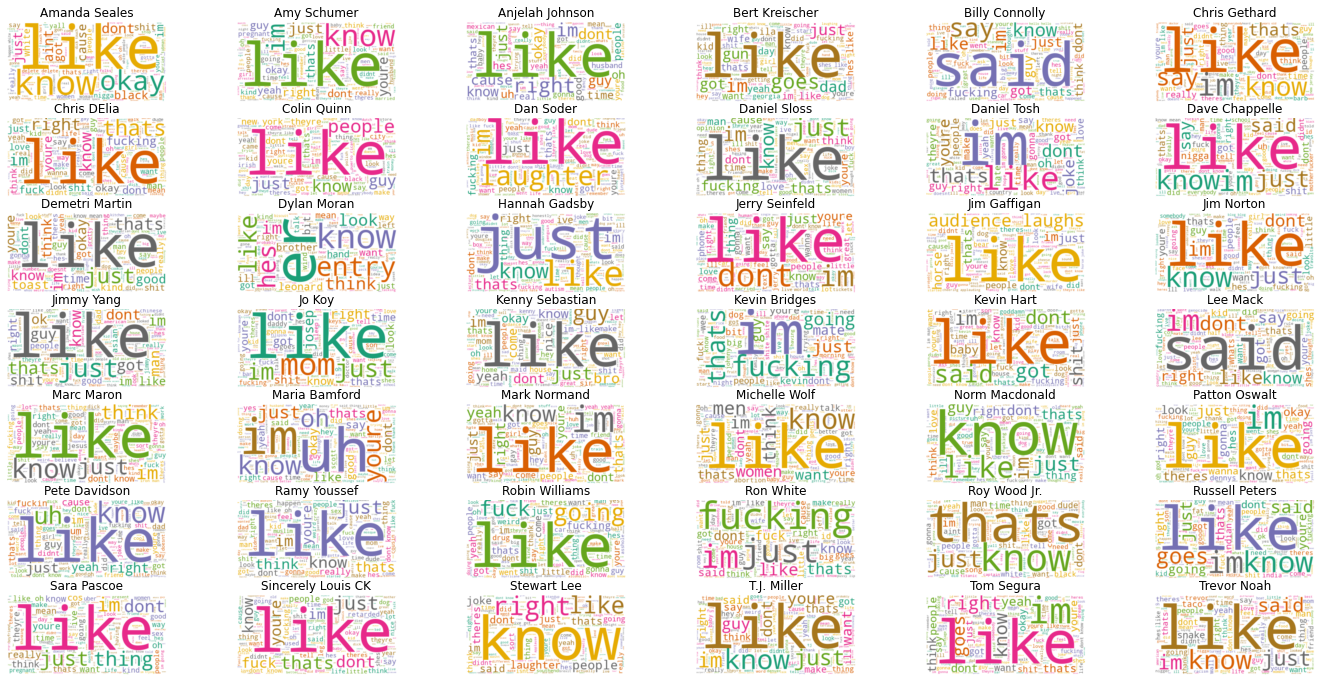

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [24, 12]

#full_names = ['Amanda Seales','Dave Chappelle', 'Jerry Seinfeld', 'Hannah Gadsby', 'Maria Bamford', 'Mark Normand', 'Patton Oswalt', 
#              'Pete Davidson', 'Roy Wood Jr.', 'Russell Peters','Sincerely Louis CK', 'Tom Segura']
#full_names = ['Amanda Seales', 'Colin Quinn', 'Dave Chappelle', 'Jerry Seinfeld', 'Hannah Gadsby', 'Maria Bamford', 'Mark Normand', 
 #             'Norm Macdonald', 'Patton Oswalt', 'Pete Davidson', 'Roy Wood Jr.', 'Russell Peters','Sincerely Louis CK', 'Tom Segura']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(7, 6, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

# Number of Words

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list, ratings)), columns=['comedian', 'unique_words', 'ratings'])
data_unique_sort = data_words.sort_values(by='comedian')
data_unique_sort

comedian  unique_words  ratings
0        Amanda Seales           995      6.4
1          Amy Schumer          1030      5.2
2      Anjelah Johnson          1165      5.8
3       Bert Kreischer          1266      7.1
4       Billy Connolly          1902      7.8
6          Chris DElia          1088      6.6
5        Chris Gethard          1839      7.6
7          Colin Quinn          1737      6.8
8            Dan Soder          1471      7.5
9         Daniel Sloss          1807      8.5
10         Daniel Tosh          1692      7.7
11      Dave Chappelle          1232      8.5
12      Demetri Martin          1284      8.2
13         Dylan Moran           409      7.2
14       Hannah Gadsby          1517      7.8
15      Jerry Seinfeld          1425      6.7
16        Jim Gaffigan          1678      7.6
17          Jim Norton          1322      7.1
18          Jimmy Yang          1219      7.1
19              Jo Koy           728      7.9
20     Kenny Sebastian          1040      7.4
21       Kevin Bridges          1581      7.6
22          Kevin Hart          1149      6.5
23            Lee Mack          1424      7.2
24          Marc Maron          1375      6.8
25       Maria Bamford          1617      7.8
26        Mark Normand          1220      5.3
27       Michelle Wolf          1091      7.1
28      Norm Macdonald          1037      7.2
29       Patton Oswalt          1409      6.3
30       Pete Davidson          1041      6.0
31        Ramy Youssef           976      6.9
32      Robin Williams          2209      7.8
33           Ron White          1290      6.5
34        Roy Wood Jr.           917      5.7
35      Russell Peters          1180      6.2
36         Sara Pascoe           876      7.5
37  Sincerely Louis CK          1059      8.4
38         Stewart Lee          2175      8.5
39         T.J. Miller          1327      7.1
40          Tom Segura          1332      7.3
41         Trevor Noah          1240      7.2

In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)

 # Comedy special run times from IMDB, in minutes

run_times = [60, 60, 90, 62,96, 89, 65, 62, 64, 89, 60, 65, 56, 70, 72, 60, 75, 61, 57, 59, 60, 85, 60, 60, 71, 64, 55, 59, 61, 67, 49,
             60, 90, 63, 60, 67, 77, 60, 119, 67, 70, 63]
# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='comedian')
data_wpm_sort

comedian  unique_words  ...  run_times  words_per_minute
0        Amanda Seales           995  ...         60         38.133333
1          Amy Schumer          1030  ...         60         48.400000
2      Anjelah Johnson          1165  ...         90         38.955556
3       Bert Kreischer          1266  ...         62         67.483871
4       Billy Connolly          1902  ...         96         54.885417
6          Chris DElia          1088  ...         65         73.923077
5        Chris Gethard          1839  ...         89         70.730337
7          Colin Quinn          1737  ...         62         82.564516
8            Dan Soder          1471  ...         64         74.609375
9         Daniel Sloss          1807  ...         89         73.235955
10         Daniel Tosh          1692  ...         60         68.483333
11      Dave Chappelle          1232  ...         65         56.030769
12      Demetri Martin          1284  ...         56         66.000000
13         Dylan Moran           409  ...         70         11.557143
14       Hannah Gadsby          1517  ...         72         65.152778
15      Jerry Seinfeld          1425  ...         60         57.966667
16        Jim Gaffigan          1678  ...         75         70.066667
17          Jim Norton          1322  ...         61         60.016393
18          Jimmy Yang          1219  ...         57         72.456140
19              Jo Koy           728  ...         59         45.101695
20     Kenny Sebastian          1040  ...         60         54.200000
21       Kevin Bridges          1581  ...         85         47.305882
22          Kevin Hart          1149  ...         60         79.666667
23            Lee Mack          1424  ...         60         66.883333
24          Marc Maron          1375  ...         71         71.070423
25       Maria Bamford          1617  ...         64         61.531250
26        Mark Normand          1220  ...         55         75.363636
27       Michelle Wolf          1091  ...         59         58.305085
28      Norm Macdonald          1037  ...         61         50.754098
29       Patton Oswalt          1409  ...         67         58.074627
30       Pete Davidson          1041  ...         49         82.693878
31        Ramy Youssef           976  ...         60         56.450000
32      Robin Williams          2209  ...         90         73.333333
33           Ron White          1290  ...         63         57.222222
34        Roy Wood Jr.           917  ...         60         48.416667
35      Russell Peters          1180  ...         67         71.701493
36         Sara Pascoe           876  ...         77         27.376623
37  Sincerely Louis CK          1059  ...         60         60.983333
38         Stewart Lee          2175  ...        119         59.151261
39         T.J. Miller          1327  ...         67         59.880597
40          Tom Segura          1332  ...         70         59.585714
41         Trevor Noah          1240  ...         63         73.111111

[42 rows x 6 columns]

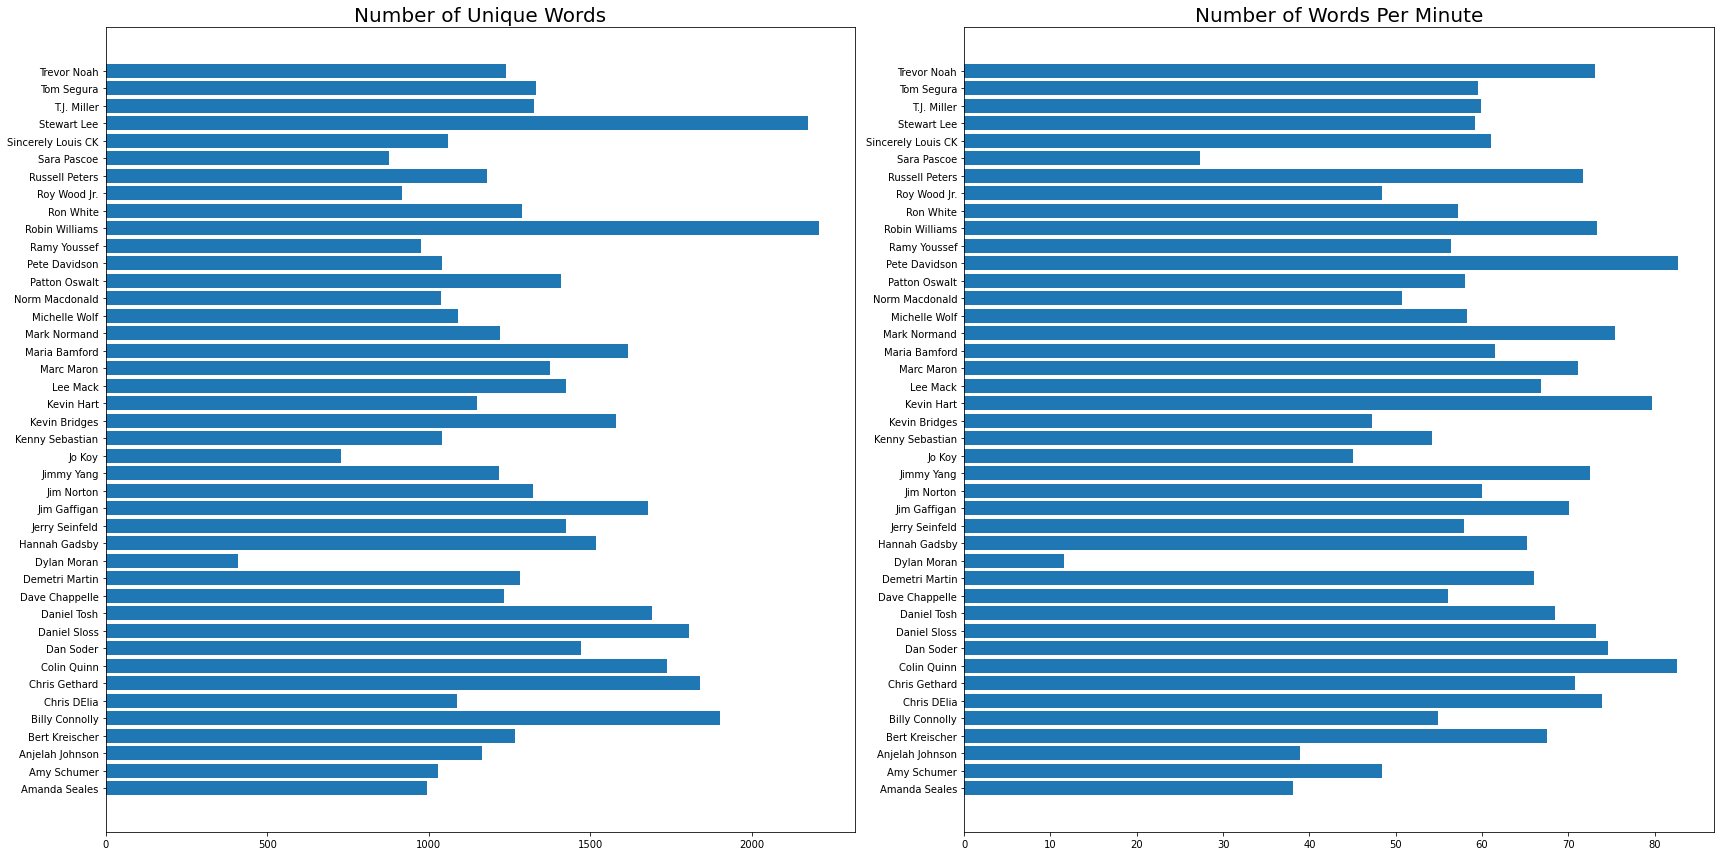

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
# Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 42),
 ('know', 42),
 ('dont', 42),
 ('im', 42),
 ('just', 42),
 ('thats', 41),
 ('right', 41),
 ('youre', 40),
 ('got', 38),
 ('people', 38),
 ('oh', 38),
 ('think', 36),
 ('want', 36),
 ('time', 34),
 ('say', 33),
 ('hes', 31),
 ('theres', 30),
 ('gonna', 30),
 ('yeah', 29),
 ('going', 29),
 ('did', 28),
 ('good', 28),
 ('thing', 28),
 ('didnt', 27),
 ('really', 26),
 ('theyre', 26),
 ('guy', 26),
 ('cause', 25),
 ('shit', 25),
 ('said', 24),
 ('look', 23),
 ('make', 23),
 ('man', 22),
 ('fuck', 22),
 ('ill', 21),
 ('fucking', 21),
 ('love', 21),
 ('way', 21),
 ('little', 20),
 ('ive', 20),
 ('tell', 20),
 ('come', 19),
 ('okay', 17),
 ('shes', 17),
 ('guys', 15),
 ('mean', 15),
 ('day', 15),
 ('hey', 14),
 ('life', 12),
 ('gotta', 11),
 ('goes', 11),
 ('kids', 11),
 ('doing', 11),
 ('years', 11),
 ('thank', 10),
 ('uh', 10),
 ('lot', 10),
 ('feel', 9),
 ('women', 8),
 ('went', 8),
 ('great', 8),
 ('mom', 8),
 ('dog', 8),
 ('god', 8),
 ('white', 7),
 ('baby', 7),
 ('dad', 7)

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
amanda             6      19
amy               19       6
anjelah            0       0
bert              40      20
billy             74      19
chris             12       8
chris_d          171      62
colin             11      16
dan              112      27
daniel           132      21
daniel_tosh       13       5
dave              34      34
demetri           14      22
dylan              0       0
hannah            66       8
jerry              0       0
jim_gaffigan       0       0
jim_norton        51      11
jimmy             25      37
jo                42      34
kenny              0      22
kevin             90      13
kevin_hart        84      83
lee               32       4
marc              68      18
maria              8       8
mark               5       9
michelle           5       3
norm              31       5
patton            35      23
pete              47      19
ramy              36      19
robin            165      36
ron              112      15
roy                1      17
russel            63      26
sara               1       1
sincerely         85      18
stewart           16       8
tj                10       2
tom               42      28
trevor             0      13

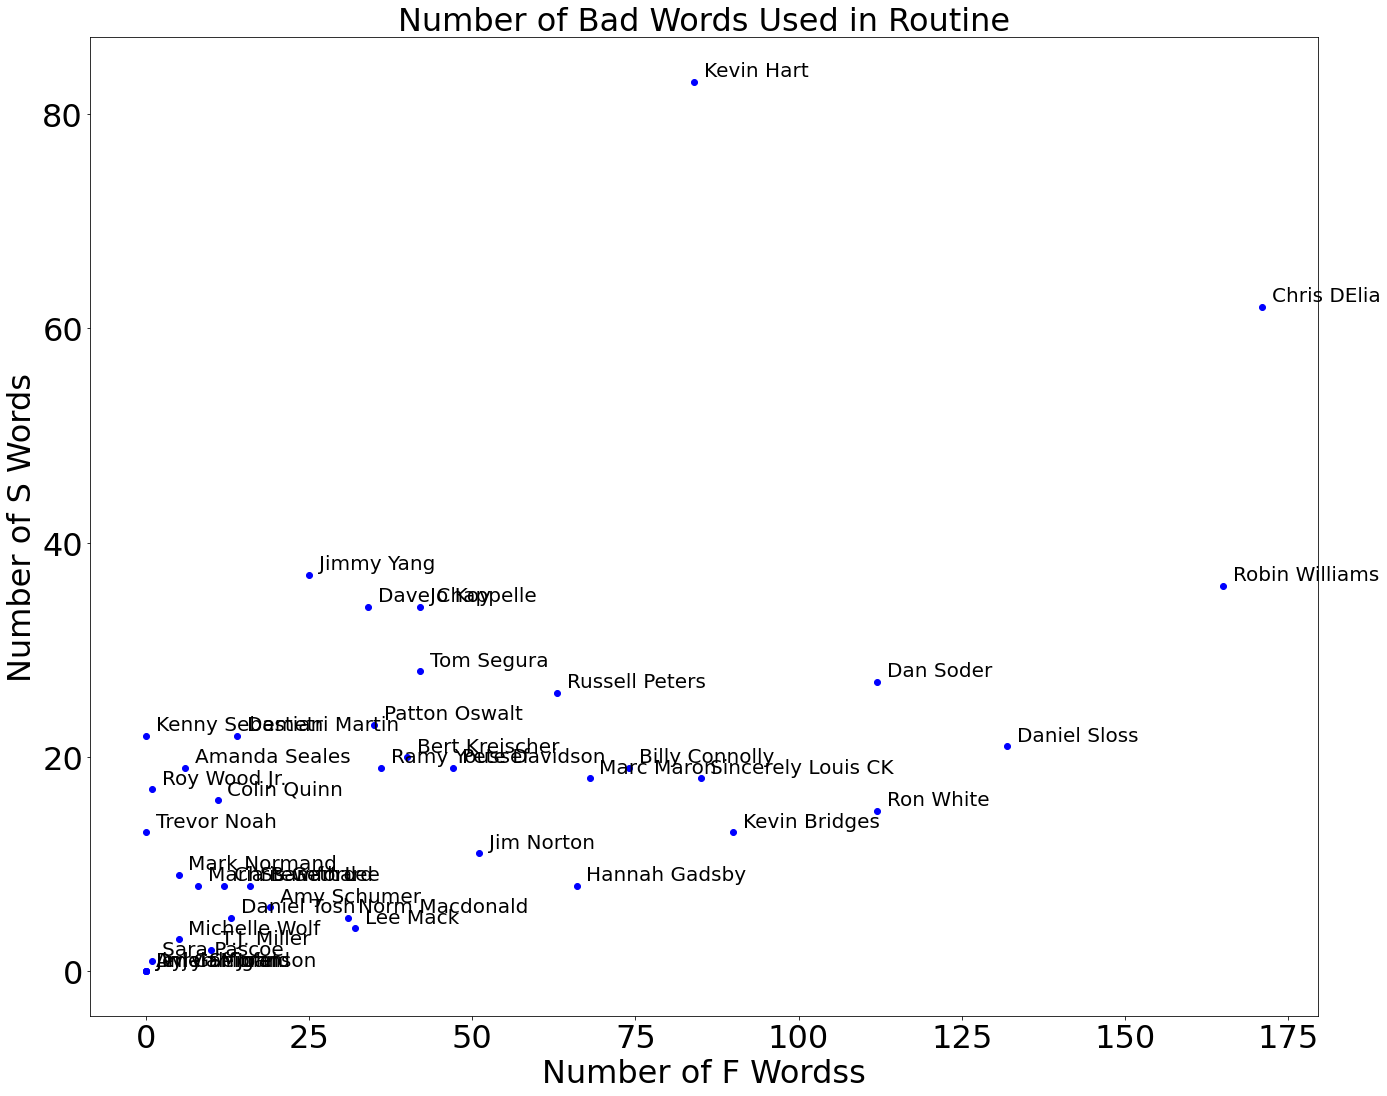

In [ ]:
#Create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [22, 18]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=20)
   # plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=32)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.xlabel('Number of F Wordss', fontsize=32)
plt.ylabel('Number of S Words', fontsize=32)

plt.show()

In [ ]:
data_profanity['Rating'] = ratings
print(data_profanity)


              f_word  s_word  Rating
amanda             6      19     6.4
amy               19       6     5.2
anjelah            0       0     5.8
bert              40      20     7.1
billy             74      19     7.8
chris             12       8     7.6
chris_d          171      62     6.6
colin             11      16     6.8
dan              112      27     7.5
daniel           132      21     8.5
daniel_tosh       13       5     7.7
dave              34      34     8.5
demetri           14      22     8.2
dylan              0       0     7.2
hannah            66       8     7.8
jerry              0       0     6.7
jim_gaffigan       0       0     7.6
jim_norton        51      11     7.1
jimmy             25      37     7.1
jo                42      34     7.9
kenny              0      22     7.4
kevin             90      13     7.6
kevin_hart        84      83     6.5
lee               32       4     7.2
marc              68      18     6.8
maria              8       8     7.8
m

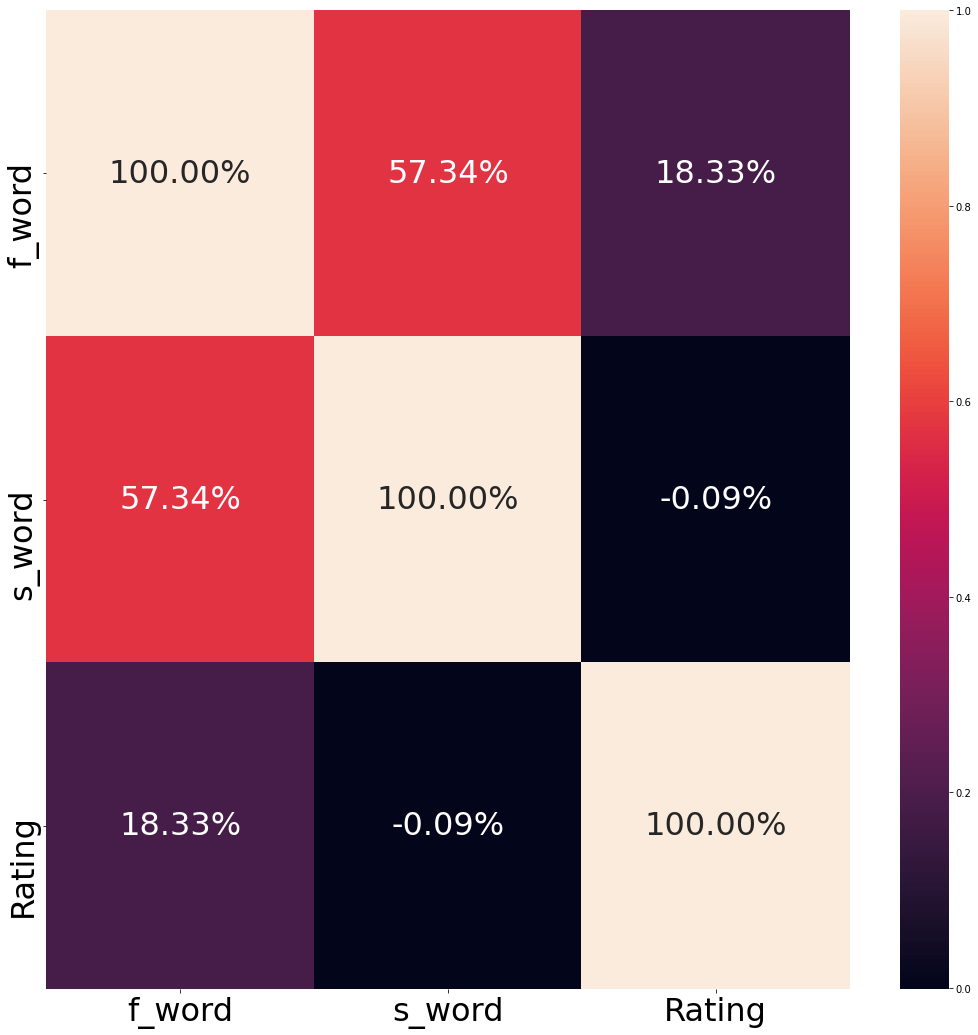

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(data_profanity.corr(), annot= True, annot_kws= {'size':32}, fmt= '.2%')
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.show()

## Sentiment Analysis



1.   **TextBlob Module**: Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2.   **Sentiment Labels**: Each word in a corpus is labeled in terms of polarity and subjectivity. A corpus' sentiment is the average of these.


*   **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
*   **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.


Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.




## Sentiment of Routine

In [ ]:
#Reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript  ... ratings
amanda        Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for...  ...     6.4
amy           Yes! Thank you so much, Chicago. Thank you. I used to do something a lot of comics do. I would blame my disgusting behavior on the city I was in. ...  ...     5.2
anjelah       Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...  ...     5.8
bert          [electronic music playing] [male announcer] Ladies and gentlemen… Bert Kreischer! [crowd cheering] Yeah! What’s up? Cleveland! [cheering, whooping...  ...     7.1
billy         Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...  ...     7.8
chris         ♪ I hate my brain ♪\n♪ Because the things I think sometimes ♪\n♪ Are so judgmental and lame ♪\n♪ I’ve got everything that I want ♪\n♪ Except my se...  ...     7.6
chris_d       [♪♪♪] ♪ Fire ♪\n♪ Fire ♪ [audience cheering] ♪ Man on fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Man on fire ♪ Yes. [audience continues cheering] Yes...  ...     6.6
colin         [disco music playing] [horn blows] ♪ Young and pretty New York City girl ♪\n♪ Twenty-five, 35, hello, baby, New York City girl ♪\n♪ You grew up ri...  ...     6.8
dan           Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti...  ...     7.5
daniel        A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...  ...     8.5
daniel_tosh    Recorded at OC Pavilion in Santa Ana, CA Dan, in five minutes. Daniel. Let’s begin. Ladies and gentlemen. Daniel Tosh. Thank you. Thank you. I de...  ...     7.7
dave          Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt...  ...     8.5
demetri       [cheering, applause] [Demetri] Man, that was a good improv. I’m so glad I asked for notes. I think my favorite animal to look at is probably the s...  ...     8.2
dylan           To give his wife some space, Aiden undertakes a tough Arctic expedition with her brother. Written and performed by Dylan Moran.  Original Broadc...  ...     7.2
hannah        The following is the transcript of Hannah Gadbsy: Douglas. In her second Netflix special, named after her dog, Gadsby explores how autism affects ...  ...     7.8
jerry         Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...  ...     6.7
jim_gaffigan  (audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th...  ...     7.6
jim_norton    This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...  ...     7.1
jimmy         ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...  ...     7.1
jo            [hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...  ...     7.9
kenny         Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...  ...     7.4
kevin         Ladies and gentlemen, please welcome Kevin Bridges! APPLAUSE Yes, thank you, Glasgow! Saturday night, Glasgow. Thank you. Yes, welcome, welcome, w...  ...     7.6
kevin_hart    [heartbeat] [indistinct chatter] [atmospheric whooshing] [audience c

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

transcript  ... subjectivity
amanda        Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for...  ...     0.431038
amy           Yes! Thank you so much, Chicago. Thank you. I used to do something a lot of comics do. I would blame my disgusting behavior on the city I was in. ...  ...     0.549666
anjelah       Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...  ...     0.470946
bert          [electronic music playing] [male announcer] Ladies and gentlemen… Bert Kreischer! [crowd cheering] Yeah! What’s up? Cleveland! [cheering, whooping...  ...     0.497054
billy         Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...  ...     0.512181
chris         ♪ I hate my brain ♪\n♪ Because the things I think sometimes ♪\n♪ Are so judgmental and lame ♪\n♪ I’ve got everything that I want ♪\n♪ Except my se...  ...     0.490760
chris_d       [♪♪♪] ♪ Fire ♪\n♪ Fire ♪ [audience cheering] ♪ Man on fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Man on fire ♪ Yes. [audience continues cheering] Yes...  ...     0.561752
colin         [disco music playing] [horn blows] ♪ Young and pretty New York City girl ♪\n♪ Twenty-five, 35, hello, baby, New York City girl ♪\n♪ You grew up ri...  ...     0.434943
dan           Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti...  ...     0.523609
daniel        A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...  ...     0.536920
daniel_tosh    Recorded at OC Pavilion in Santa Ana, CA Dan, in five minutes. Daniel. Let’s begin. Ladies and gentlemen. Daniel Tosh. Thank you. Thank you. I de...  ...     0.536104
dave          Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt...  ...     0.521939
demetri       [cheering, applause] [Demetri] Man, that was a good improv. I’m so glad I asked for notes. I think my favorite animal to look at is probably the s...  ...     0.540108
dylan           To give his wife some space, Aiden undertakes a tough Arctic expedition with her brother. Written and performed by Dylan Moran.  Original Broadc...  ...     0.492528
hannah        The following is the transcript of Hannah Gadbsy: Douglas. In her second Netflix special, named after her dog, Gadsby explores how autism affects ...  ...     0.548747
jerry         Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...  ...     0.477569
jim_gaffigan  (audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th...  ...     0.497251
jim_norton    This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...  ...     0.577182
jimmy         ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...  ...     0.451057
jo            [hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...  ...     0.579864
kenny         Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...  ...     0.574216
kevin         Ladies and gentlemen, please welcome Kevin Bridges! APPLAUSE Yes, thank you, Glasgow! Saturday night, Glasgow. Thank you. Yes, welcome,

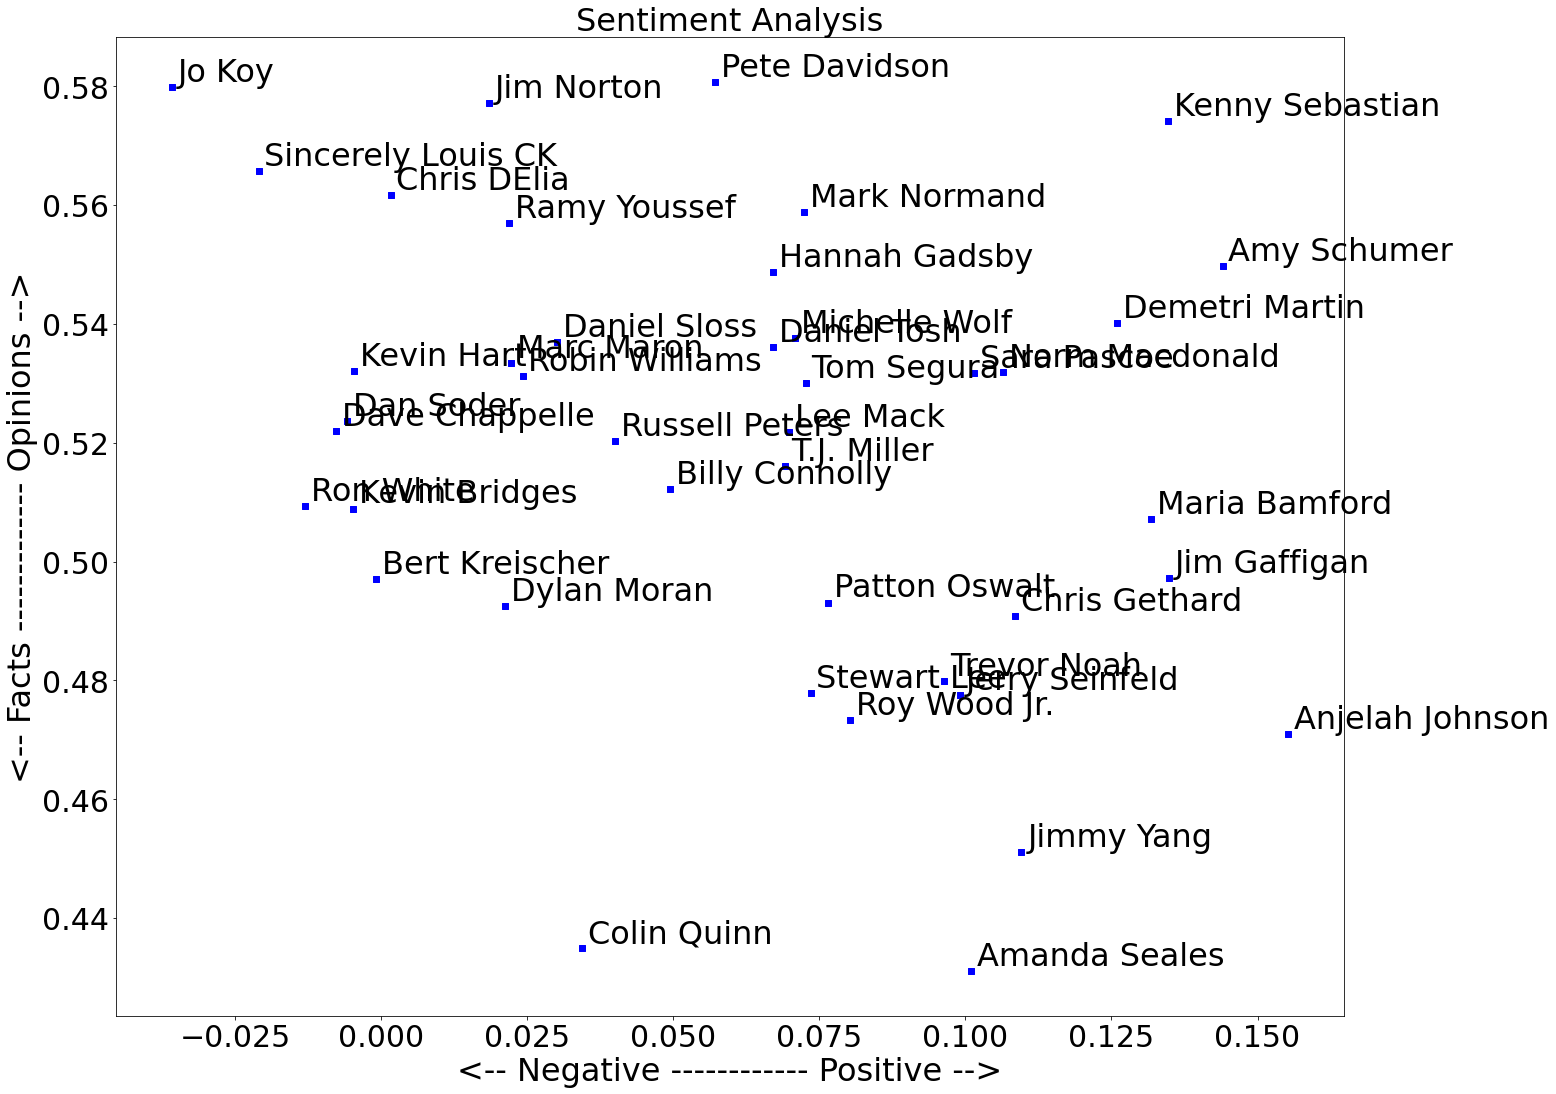

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [22, 18]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue', marker='s')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=32)
    #plt.xlim(-.025, .135) 
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    
plt.title('Sentiment Analysis', fontsize=32)
plt.xlabel('<-- Negative ------------ Positive -->', fontsize=32)
plt.ylabel('<-- Facts ------------- Opinions -->', fontsize=32)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 20 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 20 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

transcript  ... subjectivity
amanda        Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for...  ...     0.431038
amy           Yes! Thank you so much, Chicago. Thank you. I used to do something a lot of comics do. I would blame my disgusting behavior on the city I was in. ...  ...     0.549666
anjelah       Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...  ...     0.470946
bert          [electronic music playing] [male announcer] Ladies and gentlemen… Bert Kreischer! [crowd cheering] Yeah! What’s up? Cleveland! [cheering, whooping...  ...     0.497054
billy         Ladies and gentlemen, would you please welcome Billy Connolly! You’re only doing that because I’m not well. “I love you, Billy!” I’m not a well ma...  ...     0.512181
chris         ♪ I hate my brain ♪\n♪ Because the things I think sometimes ♪\n♪ Are so judgmental and lame ♪\n♪ I’ve got everything that I want ♪\n♪ Except my se...  ...     0.490760
chris_d       [♪♪♪] ♪ Fire ♪\n♪ Fire ♪ [audience cheering] ♪ Man on fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Fire ♪\n♪ Man on fire ♪ Yes. [audience continues cheering] Yes...  ...     0.561752
colin         [disco music playing] [horn blows] ♪ Young and pretty New York City girl ♪\n♪ Twenty-five, 35, hello, baby, New York City girl ♪\n♪ You grew up ri...  ...     0.434943
dan           Announcer: Ladies and gentlemen, Dan Soder! (cheers and applause) (cheering continues) (chuckles): Yeah. Yay! How the hell are ya? (cheering conti...  ...     0.523609
daniel        A man offered us a billion dollars. – Bolt the doors. – We could all go to prison. Enjoy the injunction. Did you just try to punch the wall and mi...  ...     0.536920
daniel_tosh    Recorded at OC Pavilion in Santa Ana, CA Dan, in five minutes. Daniel. Let’s begin. Ladies and gentlemen. Daniel Tosh. Thank you. Thank you. I de...  ...     0.536104
dave          Sticks & Stones is Dave Chappelle’s fifth Netflix special.\nIn the promotional trailer Morgan Freeman narrates as Chappelle swaggers across a salt...  ...     0.521939
demetri       [cheering, applause] [Demetri] Man, that was a good improv. I’m so glad I asked for notes. I think my favorite animal to look at is probably the s...  ...     0.540108
dylan           To give his wife some space, Aiden undertakes a tough Arctic expedition with her brother. Written and performed by Dylan Moran.  Original Broadc...  ...     0.492528
hannah        The following is the transcript of Hannah Gadbsy: Douglas. In her second Netflix special, named after her dog, Gadsby explores how autism affects ...  ...     0.548747
jerry         Jerry Seinfeld’s new hourlong comedy special, Jerry Seinfeld: 23 Hours to Kill is now available on Netflix [In the first scene of the special we s...  ...     0.477569
jim_gaffigan  (audience cheering, applauding) Thank you! Thank you! Oh my God. Thank you. Thank you for coming out. (audience cheering) It’s good to be here. Th...  ...     0.497251
jim_norton    This year I wanted the opening of my new special to feel, well, special. So I wanted to get somebody who is not only well known but who my audienc...  ...     0.577182
jimmy         ANNOUNCER: Ladies and gentlemen, welcome to the stage… Jimmy O. Yang! [CHEERING] [MUSIC – METER MOBB FT TOO $HORT, “YOU CAME TO PARTY”] How’s ever...  ...     0.451057
jo            [hip-hop music] L.A., are you ready? [cheers and applause] Live from the Alex Theatre, give it up for Jo Koy! What? What? Oh, shit. Wow. We’re in ...  ...     0.579864
kenny         Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...  ...     0.574216
kevin         Ladies and gentlemen, please welcome Kevin Bridges! APPLAUSE Yes, thank you, Glasgow! Saturday night, Glasgow. Thank you. Yes, welcome,

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for everybody. Okay, maybe not for everybody. Everybody except for racists, rapists, sexists, misogynists, narcissists. You know, folks that are callin’ the cops on black folks just livin’ our lives. Yeah, it ain’t for you. It ain’t for fuck boys, or trife gals, or that one ex, who still ain’t paid you that money back he owes you. Uh-huh. No laughs for them. It ain’t for Trump voters, or coons, or… people who don’t believe that white men can be terrorists. It ain’t for homophobes, or transphobes, or xenophobes. You know that wall is some bullshit. Hmm. It ain’t for bullies, it ain’t for poachers, it ain’t for abusers. It ain’t for people who keep asking me, “Amanda, can I pick your brain?” No! It ain’t for dudes who want head but don’t wanna eat no pussy! It ain’t for you! It also is not for people who don’t take care of their kids. It ain’t 

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

42

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

20

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    


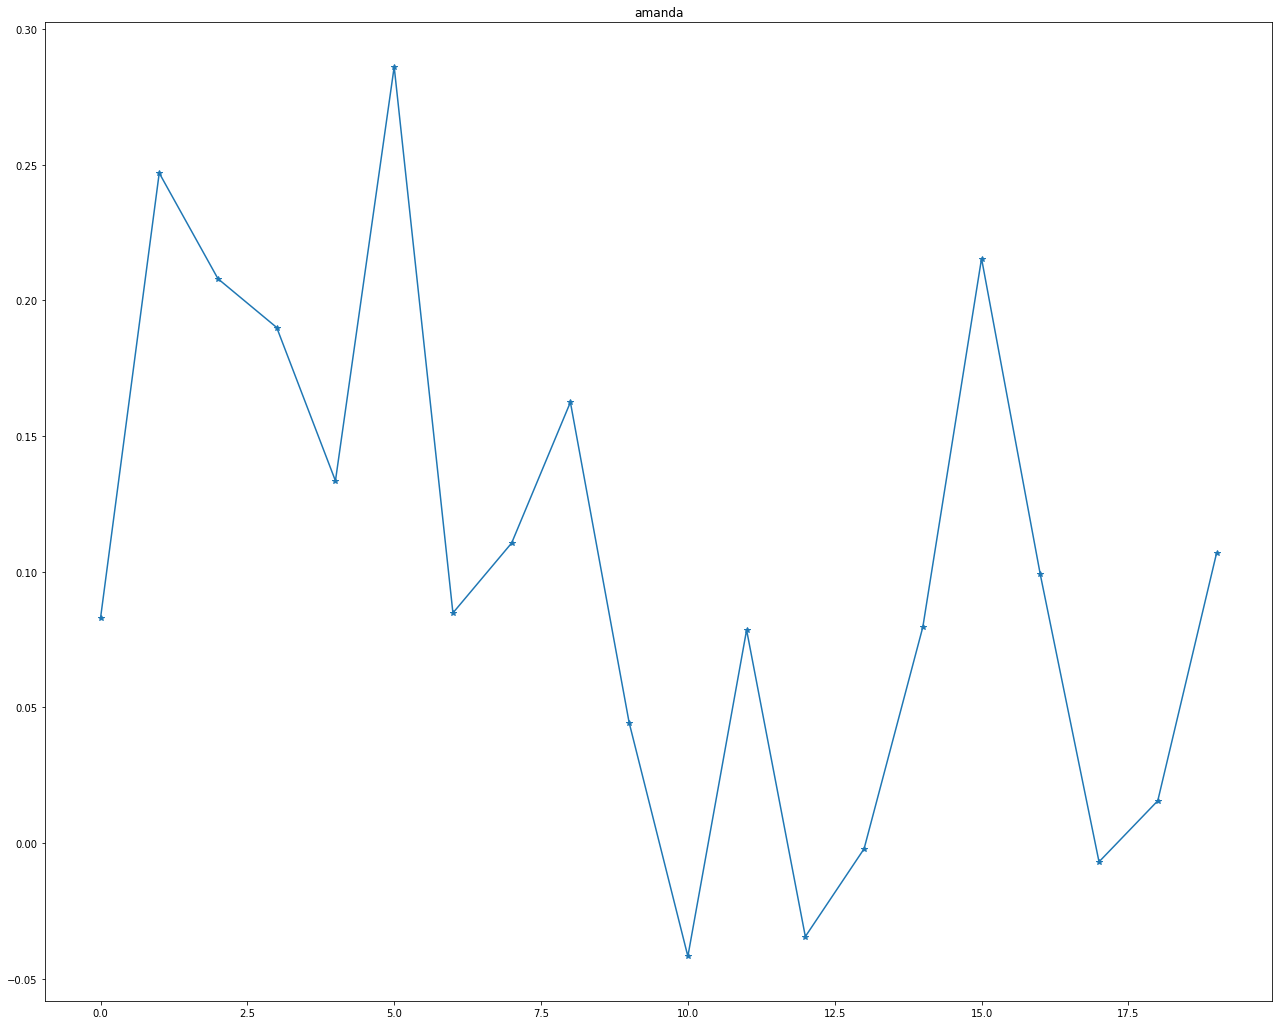

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0],'-*')
plt.title(data['full_name'].index[0])
plt.show()

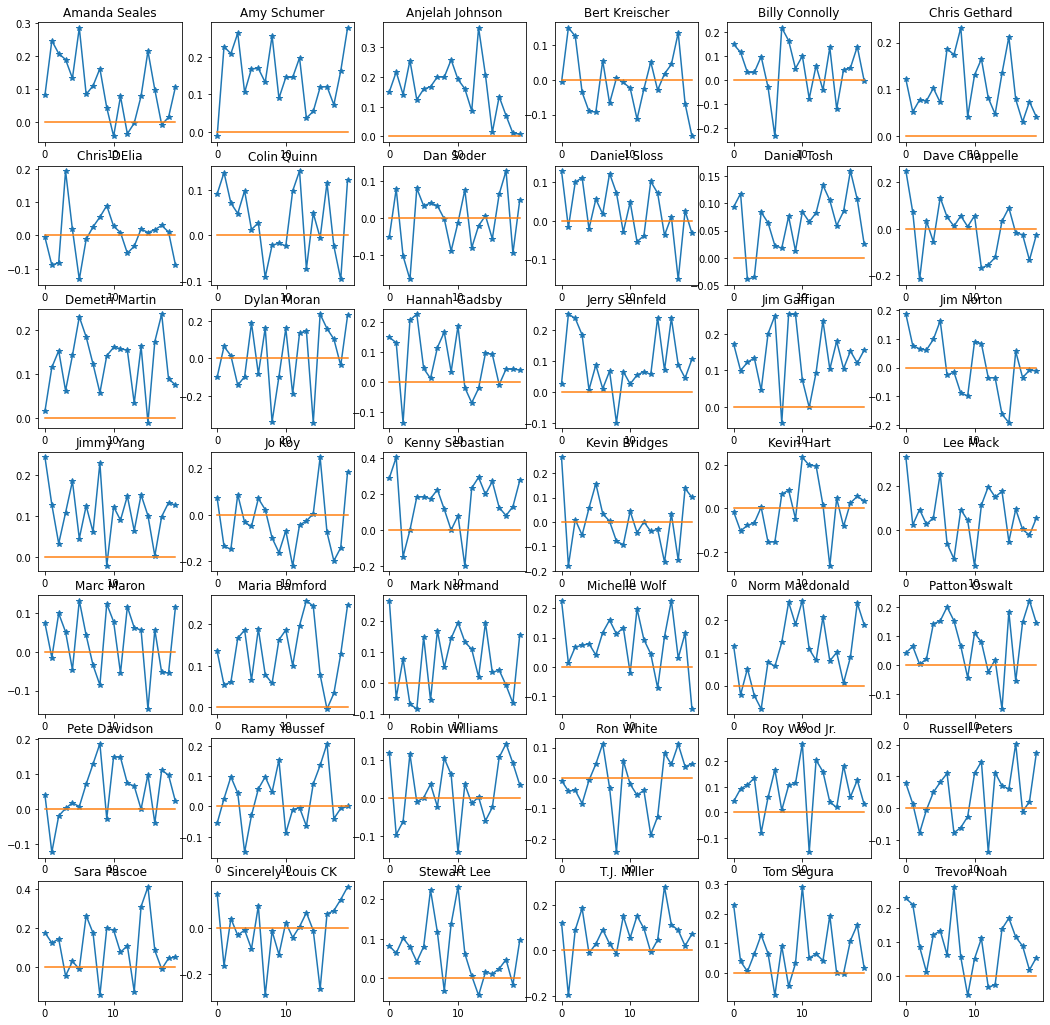

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [18, 18]

for index, comedian in enumerate(data.index):    
    plt.subplot(7, 6, index+1)
    plt.plot(polarity_transcript[index], '-*')
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['full_name'][index])
    #plt.ylim(ymin=-.2, ymax=.3)
plt.show()

In [ ]:
data_profanity

f_word  s_word  Rating
amanda             6      19     6.4
amy               19       6     5.2
anjelah            0       0     5.8
bert              40      20     7.1
billy             74      19     7.8
chris             12       8     7.6
chris_d          171      62     6.6
colin             11      16     6.8
dan              112      27     7.5
daniel           132      21     8.5
daniel_tosh       13       5     7.7
dave              34      34     8.5
demetri           14      22     8.2
dylan              0       0     7.2
hannah            66       8     7.8
jerry              0       0     6.7
jim_gaffigan       0       0     7.6
jim_norton        51      11     7.1
jimmy             25      37     7.1
jo                42      34     7.9
kenny              0      22     7.4
kevin             90      13     7.6
kevin_hart        84      83     6.5
lee               32       4     7.2
marc              68      18     6.8
maria              8       8     7.8
mark               5       9     5.3
michelle           5       3     7.1
norm              31       5     7.2
patton            35      23     6.3
pete              47      19     6.0
ramy              36      19     6.9
robin            165      36     7.8
ron              112      15     6.5
roy                1      17     5.7
russel            63      26     6.2
sara               1       1     7.5
sincerely         85      18     8.4
stewart           16       8     8.5
tj                10       2     7.1
tom               42      28     7.3
trevor             0      13     7.2

In [ ]:
data_wpm_sort.shape

(42, 6)

In [ ]:
data_wpm_sort[['unique_words', 'run_times', 'words_per_minute']].head()

unique_words  run_times  words_per_minute
0           995         60         38.133333
1          1030         60         48.400000
2          1165         90         38.955556
3          1266         62         67.483871
4          1902         96         54.885417

In [ ]:
data_new=data_wpm_sort.loc[:,['unique_words', 'run_times', 'words_per_minute']]
data_new[[ 'f_word', 's_word']] = pd.DataFrame(data_profanity.loc[:,[ 'f_word', 's_word']].to_numpy())
data_new[['polarity', 'subjectivity']] = pd.DataFrame(data.loc[:,['polarity', 'subjectivity']].to_numpy())
data_new['ratings']=pd.DataFrame(data.ratings.to_numpy())
data_new.hea

unique_words  run_times  words_per_minute  ...  polarity  subjectivity  ratings
0           995         60         38.133333  ...  0.100902      0.431038      6.4
1          1030         60         48.400000  ...  0.144015      0.549666      5.2
2          1165         90         38.955556  ...  0.155215      0.470946      5.8
3          1266         62         67.483871  ... -0.000885      0.497054      7.1
4          1902         96         54.885417  ...  0.049399      0.512181      7.8

[5 rows x 8 columns]

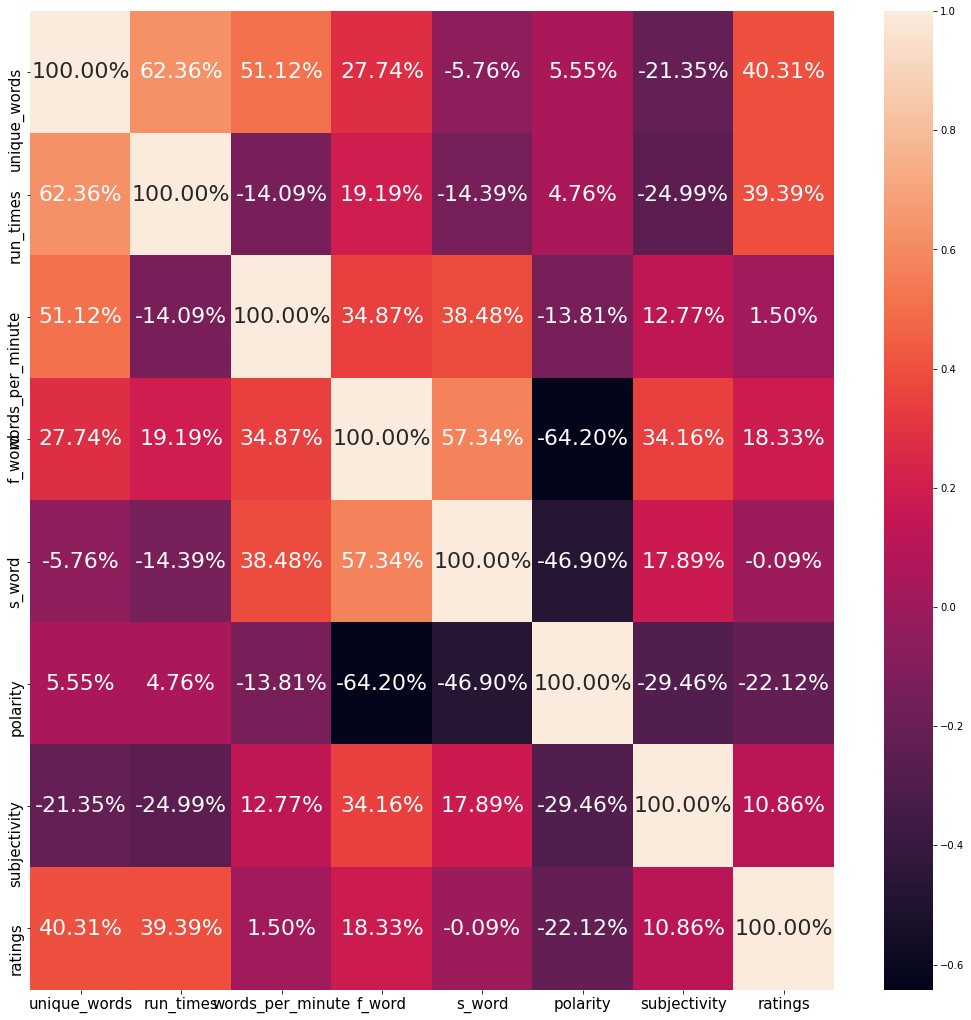

In [ ]:
sns.heatmap(data_new.corr(), annot= True, annot_kws= {'size':22}, fmt= '.2%')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

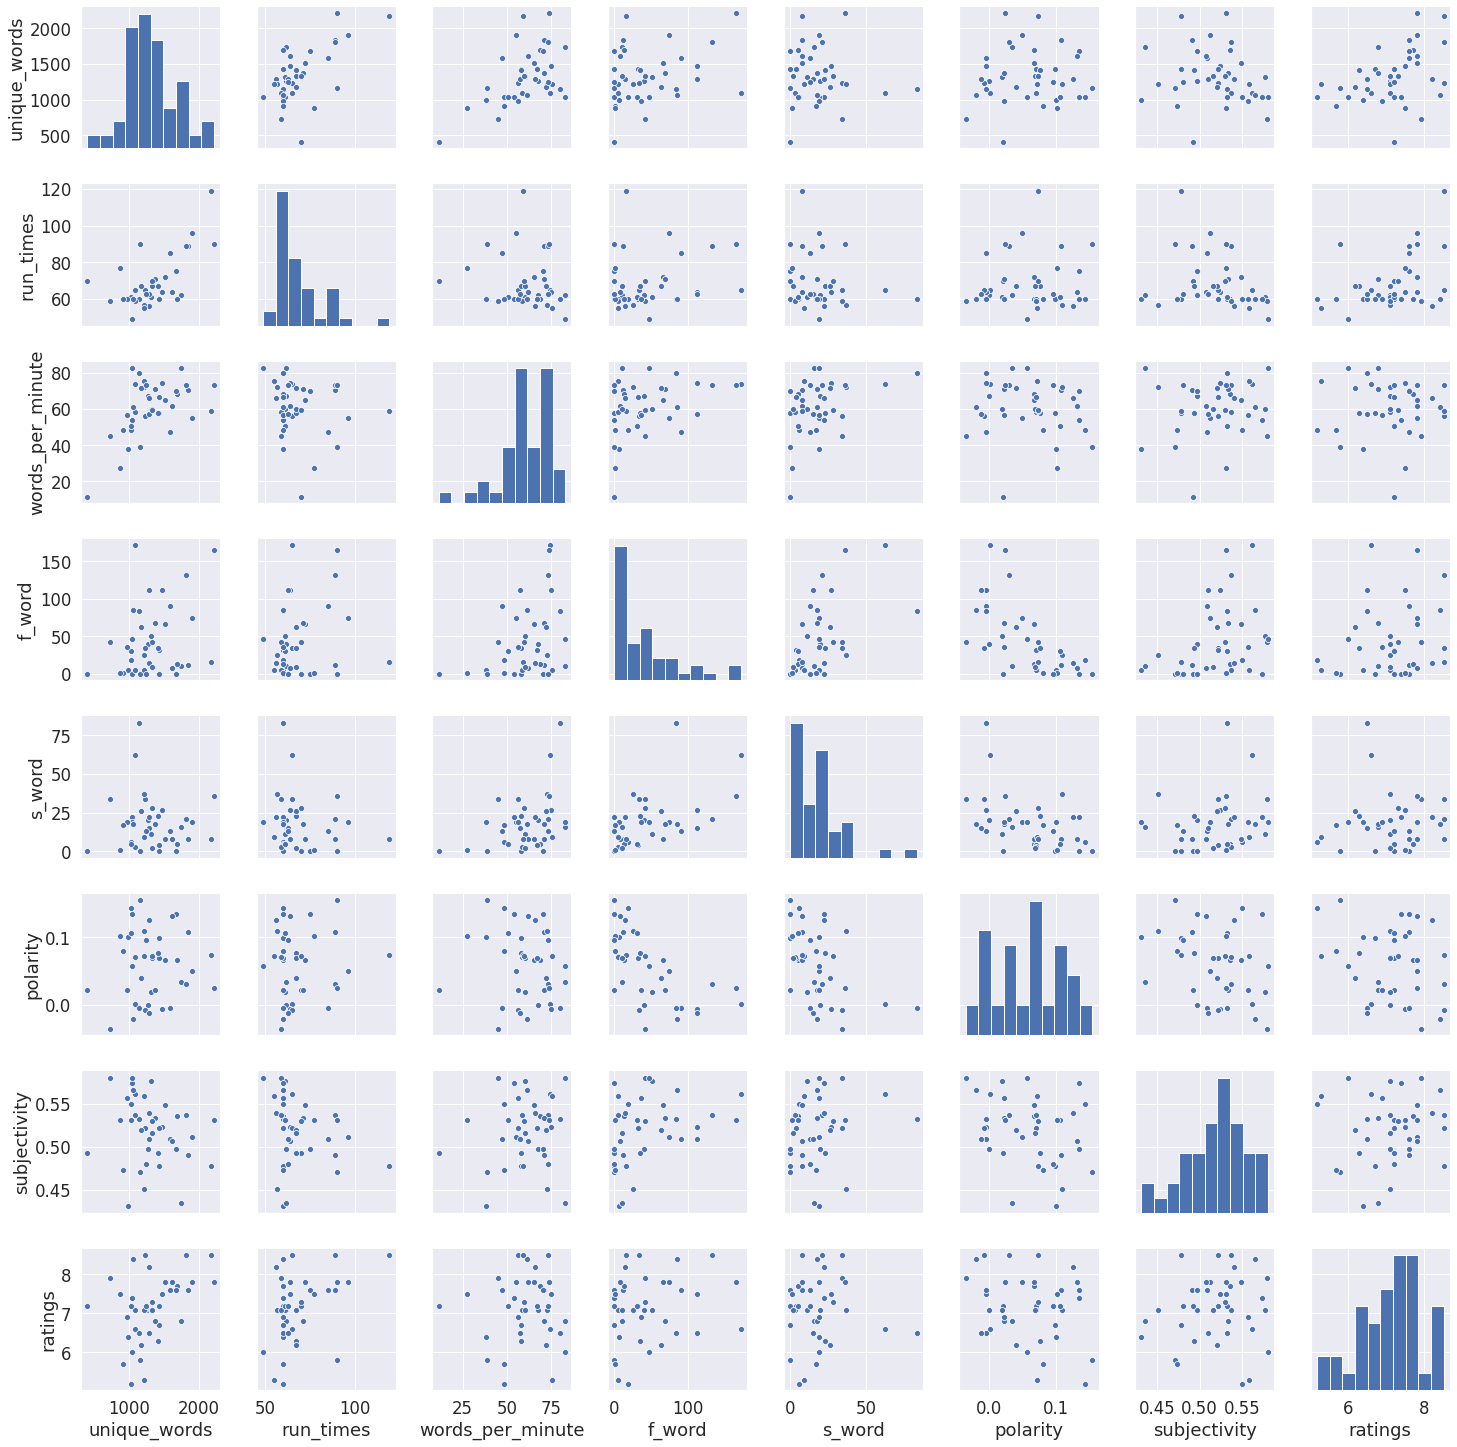

In [ ]:
sns.set(font_scale= 1.5)
sns.pairplot(data_new)

plt.show()

In [ ]:
#Feature and 
x = data_new.drop(['ratings'], axis =1)
y = data_new['ratings']

In [ ]:
#Split into train and test data
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
#model 
from sklearn.linear_model import LinearRegression

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Prediction
y_pred =clf.predict(X_test)

In [ ]:
# Model evaluation
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred)) 

0.9364198096360848


In [ ]:
0.9364198096360848*100/np.mean(y_test)

13.151963618484338

In [ ]:
X_train.columns

Index(['unique_words', 'run_times', 'words_per_minute', 'f_word', 's_word',
       'polarity', 'subjectivity'],
      dtype='object')

In [ ]:
clf.coef_.T

array([ 1.73733711e-03,  5.16081563e-03, -1.48662626e-02, -8.40579162e-03,
        8.21406251e-03, -6.13154863e+00,  9.25035618e+00])

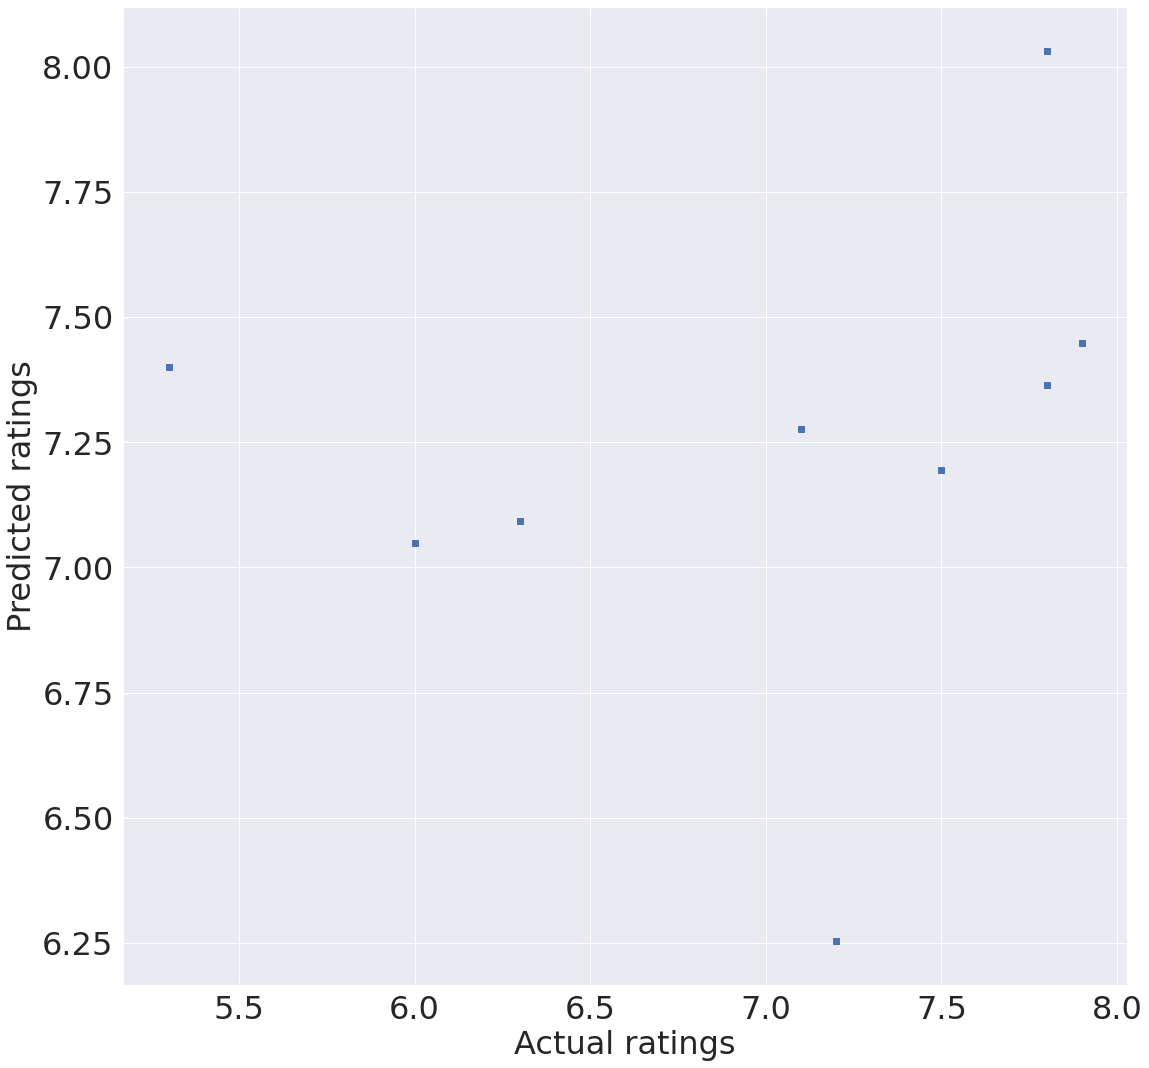

In [ ]:
plt.plot(y_test, y_pred, 's')
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)
plt.xlabel('Actual ratings', fontsize = 32)
plt.ylabel('Predicted ratings', fontsize = 32)
plt.show()

In [ ]:
X_train.shape[1]

7

In [ ]:
X_test.shape

(5, 7)

In [ ]:
#Neural Network
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1,hidden_layer_sizes=(6,3),max_iter=20000)
regr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=20000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
#regr = MLPRegressor(random_state=1,max_iter=20000)


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes':[(5,2),(10,),(10,2),(8,4),(7,3),(3,3),(4,2),(2,2)]}
clf_gr = GridSearchCV(regr, parameters)
clf_gr.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(10, 2),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=20000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=1, shuffle=True, solver='adam',
                                    tol=0.0001, validation_fraction=0.1,
                                    verbose=False, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'hidden_layer_sizes': [(5, 2), (10,), (10, 2)

In [ ]:
clf.best_params_

{'hidden_layer_sizes': (4, 2)}

In [ ]:
y_test_pre=regr.predict(X_test)

In [ ]:
y_test_pre

array([7.24986844, 4.99296648, 7.25073353, 7.06693787, 8.01548405])

In [ ]:
from sklearn.metrics import mean_squared_error
metrics.mean_squared_error(y_test, y_test_pre)

1.68085565224481

In [ ]:
from sklearn.metrics import mean_absolute_error
metrics.mean_squared_error(y_test, y_test_pre)

0.983074208558927

In [ ]:
0.966*100/np.mean(y_test_pre)

13.969231099082231